## Table of content:
* [About this document](#About-this-document)
* [Phase 2 Provisioning](#Phase-2-Provisioning)
    * [2.1 Data Requirements](#2.1-Data-Requirements)
        * [2.1.1 Domain](#2.1.1-Domain)
        * [2.1.2 Stakeholders](#2.1.2-Stakeholders)
        * [2.1.3 Required Data Elements](#2.1.3-Required-Data-Elements)
    * [2.2 Data Collection](#2.2-Data-Collection)
        * [2.2.1 Search for information](#2.2.1-Search-for-information)
        * [2.2.2 Store retrieved data](#2.2.2-Store-retrieved-data)
        * [2.2.3 How often do I want to retrieve data](#2.2.3-How-often-do-I-want-to-retrieve-data)
    * [2.3 Data Understanding](#2.3-Data-Understanding)
    * [2.4 Data Preparation](#2.4-Data-Preparation)
        * [2.4.1 How I filled missing data](#2.4.1-How-I-filled-missing-data)
    * [2.5 Data visualization](#2.5-Data-visualization)
* [Phase 3 Predictions](#Phase-3-Predictions)
    * [3.1 Preprocessing](#3.1-Preprocessing)
    * [3.2 Modelling](#3.2-Modelling)
    * [3.3 Evaluation](#3.3-Evaluation)
* [Conclusion](#Conclusion)
* [Appendix](#Appendix)

## About this document

This document contains the second and third phases of the AI methodology. For the first and last phases you can look at the Challenge proposal document. What I am going to do in short is: predicting second hand car prices. For the prediction I am using a dataset that I got from kaggle. All explanations are in the other document under the heading analytic data sourcing and Analytic approach.  

## Phase 2 Provisioning

### 2.1 Data Requirements

Like I already said in my proposal there are some features in my dataset to make my prediction. These features I got after I interviewed the director from a car dealer. The features he looks at when predicting the price are: age of a car, fuel and kilometers driven. So when I am going to look for a dataset I want at least these 3 features. 

#### 2.1.1 Domain

My challenge doesn't really have a domain if I look really good at it. I think this because selling cars is just a sector on it's self. But if you look at it a bit different you can see some relations. The relation between the store where they sell the cars to customers and the factories who sell the cars to the stores. The factories sell the cars to all over the world so the boundaries are unlimited.

If you really look global at the domain you can also see a relation between the price of fuel and price of cars. This information I got from my interview that you can find in canvas under the exercise. The price of certain cars are going up when the price of that fuel type is going up. For example when the diesel price is going up and it doesn't look like it goes down in a short period of time the price of diesel cars is going up. This is unatractive because it is gonna cost much more than when you buy a petrol car.

#### 2.1.2 Stakeholders

If this is a useful project and it would work than the stakeholders would be the consumers and dealers. The consumers will need it to see what the best price is what they can get it for. Sometimes with a car dealer the price will be to high for some people because he wants to get the most out of a car. But the price needs to be what the car is actually worth. But if you look at it from the other way than it could be used by the car dealers for the best price. They can use this information to ask for the price where most consumers would buy the car. 

#### 2.1.3 Required Data Elements

I need some information to make my prediction. You have to types of data: measurements called facts and characterization or aggregation called dimensions. For my prediction I am going to need information about both types. For the facts I need the price, kilometers driven and age. For the dimensions I need at least the brand and fuel type. For both I could be using more than these but I need at least this to make my prediction. 

*A fact table works with dimension tables. A fact table holds the data to be analyzed, and a dimension table stores data about the ways in which the data in the fact table can be analyzed. Thus, the fact table consists of two types of columns. The foreign keys column allows joins with dimension tables, and the measures columns contain the data that is being analyzed.Contributor, T. (2012, 30 april). fact table. SearchDataManagement. https://www.techtarget.com/searchdatamanagement/definition/fact-table*

### 2.2 Data Collection

#### 2.2.1 Search for information

After I had defined my data requirements I went looking for data. This is my second challenge idea but for the first one I just went on the internet and typed in dataset for cars. After I had done that I came up with an dataset where they discribed the dataset so well. *FirstName, L. (z.d.). DVM Car Dataset: A Large-Scale Dataset for Automotive Applications. https://deepvisualmarketing.github.io/* here is the site where got the dataset from. It was made just for students to use and not for companys. 

For my second idea I needed a new dataset because not everything was in that dataset. So I went back on the internet and just searched again for a car dataset. I came on a few sites that had a dataset but they didn't were as big as I wanted them to be. After a few sites I came on kaggle and there were 3 datasets about cars that I could use(Kaggle: Your Home for Data Science. (z.d.). https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho). 

#### 2.2.2 Store retrieved data

In the groupproject we really need to look at how we want to store the data because it is so big. But for my own project I just gonna store the data in a folder where also this notebook is in. You can use many different ways to store the data but since I am the only one that is gonna use this data I thought this would be the easiest. 

#### 2.2.3 How often do I want to retrieve data

I will look on the site every week to see if there are changes in the dataset. But I want to clean the code in a way that if they add new rows to the dataset that I won't need to check for bad data. I want to make it in a way that I only need to add the column names in some part of code. 

### 2.3 Data Understanding

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
import pylab as pl
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

print("scikit-learn version:", sk.__version__)          # 1.1.1
print("numpy version:", np.__version__)                 # 1.22.4
print("pandas version:", pd.__version__)                # 1.4.2
print("seaborn version:", sns.__version__)              # 0.11.2

scikit-learn version: 1.1.2
numpy version: 1.23.2
pandas version: 1.4.3
seaborn version: 0.11.2


First I need to load in the dataset. In this dataset there is data about used cars. There are 13 columns: name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque and seats. This data was just scraped from websites.

In [2]:
car = pd.read_csv("Car details v3.csv")
print(car.shape)
car.sample(7)

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1077,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
4043,Tata Indica V2 Turbomax DLS BS IV,2012,275000,90000,Diesel,Individual,Manual,Second Owner,19.0 kmpl,1405 CC,71 bhp,135 Nm at 2500 rpm,5.0
6533,Mahindra XUV500 W10 2WD,2015,1147000,56975,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3010,Hyundai Santro Xing GLS LPG,2010,200000,80000,LPG,Individual,Manual,Second Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
3992,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2013,480000,87452,Diesel,Dealer,Manual,Second Owner,22.77 kmpl,1498 CC,98.59 bhp,205Nm@ 1750-3250rpm,5.0
4573,Maruti Ertiga SHVS VDI,2016,850000,35000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0
5934,Hyundai Verna 1.6 SX CRDi (O),2013,580000,80000,Diesel,Individual,Manual,Second Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0


I wanted to know each column type so I called this code underneath. As you can see there are the 13 columns of which 9 are objects, 3 int64 and 1 a float. You can also see that there are 8128 rows. 

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 539.8+ KB


#### Closer look in each column

I wanted to have a closer look in each column so I know what is in each column. So that is why for each column I called the .value.counts and after that some visualization. The visualizaton pupose is that I can have a better look at the distrubution of the values. With that I mean that some columns have outliers or some values are more common than others in a column.

To have a better overview on certain columns I wanted to print out the different values with counts. If you look at the code below you can see that in the column fuel there are 4 different types: Diesel, Petrol, CNG and LPG. 4402 of these cars are diesel and on the second place with 3631 is petrol. The fueltypes CNG and LPG are not that populair as you can see because combined they are still under the 100 cars. 

In [4]:
print(car["fuel"].value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


To have a better perspective on these numbers I am going to make a graph that shows how the distribution is in this column. As you can see above and below there are way more diesel and petrol cars than CNG and LPG. 

<AxesSubplot:ylabel='None'>

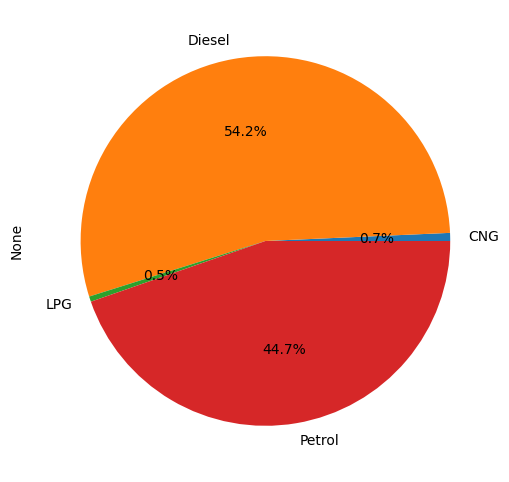

In [5]:
car.groupby('fuel').size().plot(kind='pie', figsize=(11, 6), autopct='%1.1f%%')

It becomes clear now that most of the cars sold have the standerd 5 seats(2 front and 3 in the back). Not that close behind that are the cars with 7 seats these are for the bigger families. Then you have some special numbers like 2, 10 and 14. So I looked deeper into those cars and it came out that the cars with 2 seats were trucks. The cars with 10 seats are just really big suv's and the 14 seat car is a van so that explains these numbers.

In [6]:
print(car["seats"].value_counts())

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64


In [7]:
seat = [2,10,14]
car[car.seats.isin(seat)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
604,Tata Sumo CX 10 Str BSIV,2011,175000,20000,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,"115@ 2,500(kgm@ rpm)",10.0
795,Chevrolet Tavera Neo 3 LS 10 Str,2016,409999,60000,Diesel,Individual,Manual,Second Owner,12.2 kmpl,1994 CC,105.3 bhp,263.7Nm@ 2500rpm,10.0
2086,Tata Sumo EX 10/7 Str BSIII,2012,200000,67500,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,"115@ 2,500(kgm@ rpm)",10.0
2331,Chevrolet Tavera Neo 3 10 Seats BSIII,2014,600000,110000,Diesel,Individual,Manual,First Owner,13.58 kmpl,2499 CC,72.4 bhp,171Nm@ 1800rpm,10.0
3283,Chevrolet Tavera Neo 3 LS 10 Seats BSIII,2015,580000,110000,Diesel,Individual,Manual,Second Owner,13.58 kmpl,2499 CC,72.4 bhp,171Nm@ 1800rpm,10.0
3714,Chevrolet Tavera B3 LT L1 10 Seats BSIII,2005,160000,220000,Diesel,Individual,Manual,First Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
3794,Chevrolet Tavera LS B3 10 Seats BSII,2006,225000,100000,Diesel,Individual,Manual,First Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
4112,Tata Sumo SE Plus BSII,2000,95000,120000,Diesel,Individual,Manual,Fourth & Above Owner,12.2 kmpl,1948 CC,68 bhp,12@ 2500(kgm@ rpm),10.0
4182,Chevrolet Tavera B1-10 seats BSII,2010,280000,100000,Diesel,Individual,Manual,Second Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,190Nm@ 2000-3000rpm,14.0


As you can conclude most cars are equipped with 5 seats. This can help me deside how I can fill in missing data later in the notebook.

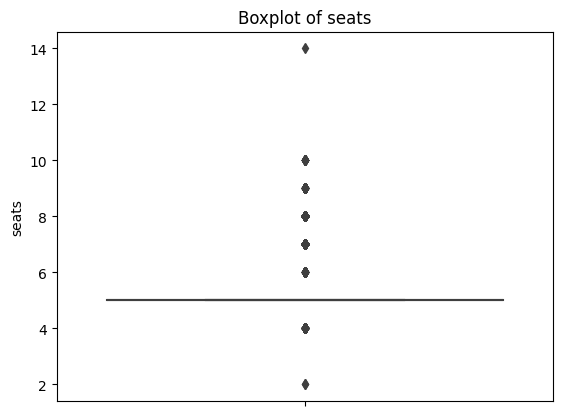

In [8]:
sns.boxplot(y='seats', data=car)
plt.title('Boxplot of seats')
plt.show()

Now I am at the column that shows how many owners a car has had before it was sold again. As you can see there are 5 different type of owners: first owner, second owner, third owner, fourth & above owner and the test drive car. Most of the cars are sold by the first owners this means that most cars are not that old. 

In [9]:
print(car["owner"].value_counts())

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


I wanted to make the above values visual so that it is more clear to me what the difference it is between the owners. As you can see most of these cars are sold by the first owners.

<AxesSubplot:ylabel='None'>

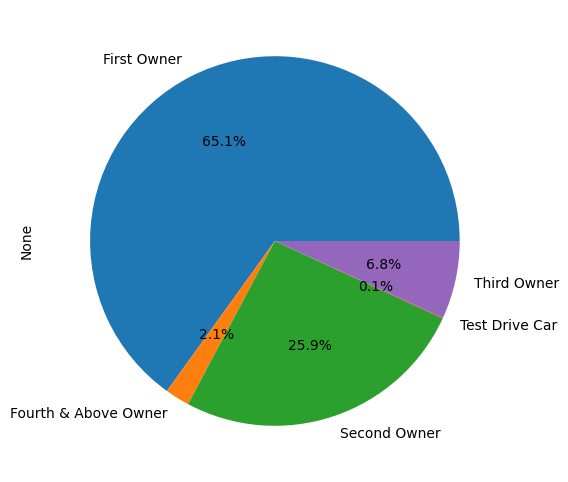

In [10]:
car.groupby('owner').size().plot(kind='pie', figsize=(11, 6), autopct='%1.1f%%')

As you can see there are 3 type of sellers. The first one individual seller this means that one person sells just one old car of his to another person. When you see dealer and trustmark dealer you think of the same thing but there is a difference between those two. A dealer sells multiple cars that he has bought. A trustmark dealer sells cars under a logo or company so he has an member of a proffesional organisation. Many car dealers have a skill to come up with the price but individual seller not. This is why I am doing this project. You can read more about this in the other document where I explain why I do this and many more things.


In [11]:
print(car["seller_type"].value_counts())

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64


To get a better perspective I made a pie chart where you can see what percentage is from each seller type. As you can see almost 85% of the sold cars are sold by the individual seller. 

<AxesSubplot:ylabel='None'>

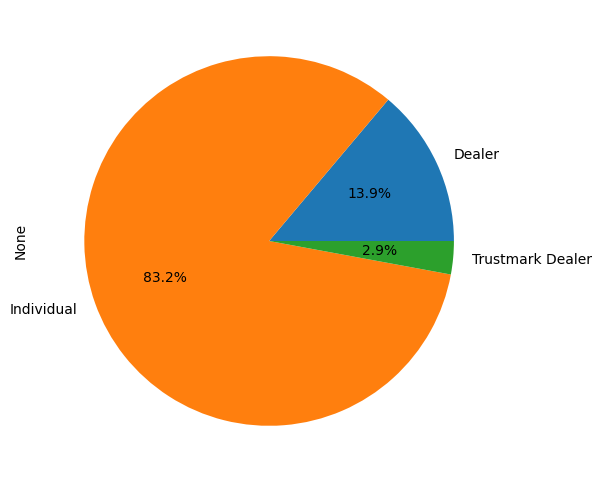

In [12]:
car.groupby('seller_type').size().plot(kind='pie', figsize=(11, 6), autopct='%1.1f%%')

The last columns I wanted to look at right now is transmission. There are just 2 types of transmission: manual or automatic. According to this site *Statista. (2021, 19 maart). Global automotive transmission outlook 2025. https://www.statista.com/statistics/204123/transmission-type-market-share-in-automobile-production-worldwide/* there are more manual cars in the world than automatic. 

In [13]:
print(car["transmission"].value_counts())

Manual       7078
Automatic    1050
Name: transmission, dtype: int64


I couldn't really see the difference between the manual and automatic from the above code but I made a pie chart. After the pie chart I could really see how the distribution was on the two types of values in this column.

<AxesSubplot:ylabel='None'>

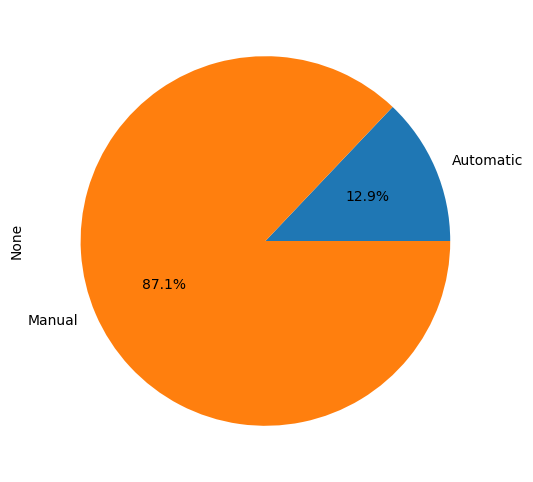

In [14]:
car.groupby('transmission').size().plot(kind='pie', figsize=(11, 6), autopct='%1.1f%%')

### 2.4 Data Preparation

After I went through all the data I wanted to change some things in these columns. For example torque is not necessary to predict a car price. Some columns were the right data but I just wanted it to be more uncluttered. I wanted to know how old a car is and not in which year it was bought. So I made a new column called age. The mileage, engine and max_power are all objects now but I want them to be floats because there is extra information behind the number that is not usefull. So I searched for extracting data from an object and found this *pandas.Series.str.extract — pandas 1.5.1 documentation. (z.d.). https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html*. After reading through the site I tried to change it so the data looked as I wanted to.

In [15]:
# Here I drop the column torque
car.drop(["torque"], axis = 1, inplace=True)

In [16]:
# Here I create a new column called age. I got the year the car was sold from today's date. This also works when new rows are added. 
car["age"] = (datetime.datetime.now().year) - (car["year"])
# After I created the new column I could drop the old one.
car.drop(["year"], axis = 1, inplace=True)

In [17]:
# This line extracts the letters from each variable and puts just the numbers in a new column called car_brand.
car["car_brand"] = car["name"].str.extract('([^\s]+)')
# After that I dropped the old column.
car.drop(["name"], axis = 1, inplace=True)

In [18]:
# This line extracts the letters from each variable.
car["max_power"] = car["max_power"].str.extract('([^\s]+)')
# This time I wanted to use the same column so I used this. I could do the same thing as the engine and mileage bacause it gave an error.
car["max_power"] = car["max_power"][~(car["max_power"] == "bhp")].astype("float")

In [19]:
car["engine"] = car["engine"].str.extract('([^\s]+)').astype("float")
car["mileage"] = car["mileage"].str.extract('([^\s]+)').astype("float")

After having modified the dataset. I needed to look if everything has changed as I wanted to. So I called the code that I used above again. As you can see underneath the data has changed. I think this is good enough but maybe I need to make some adjustments later on the fuel for example(hotline).

In [20]:
car.head(7)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,car_brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15,Maruti
5,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,5,Hyundai
6,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,15,Maruti


In the code below I used .T. I learned about this in my previous challenge iteration 0. It transposes the index and columns of the dataframe. This means that the columns and rows are switched around so the rows become the columns vice versa. I used this because the number in selling price was to big for it so it would use e+03. I chose expressly not to put it in the understanding part because I knew I would change some columns.
*https://www.geeksforgeeks.org/pandas-dataframe-t-function-in-python/#:~:text=T()%20function%20in%20Python,-View%20Discussion&text=Like%20Article-,pandas.,columns%20of%20the%20data%20frame.*

You can see that the minimal distance of a car is 1km and the maximum is 2360457km. 

In every car there are at least 2 seats and the most seats in a car are 14 seats. 

The car age differs from 2 years old till 39 years and with an average of 8.2 years old. 

In [21]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7912.0,91.517919,35.822499,0.0,68.05,82.0,102.00,400.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0
age,8128.0,8.195989,4.044249,2.0,5.00,7.0,11.00,39.0


With the code underneath I wanted to check if there were any columns with missing values. Besides the missing values you can also see that the datatypes have exactly changed as I tried to. As you can see there are 5 columns with missing data(mileage, engine, max_power and seats).

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   max_power      7912 non-null   float64
 9   seats          7907 non-null   float64
 10  age            8128 non-null   int64  
 11  car_brand      8128 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 603.3+ KB


To have a better look at how many missing values I have in my dataset. I am going to use isnull().sum(). This counts all the missing values in a column. I got this from *Python Pandas : Count NaN or missing values in DataFrame ( also row & column wise). (z.d.). thisPointer. https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/* were they explained how to do this.

In [23]:
car.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
age                0
car_brand          0
dtype: int64

<Figure size 1000x500 with 0 Axes>

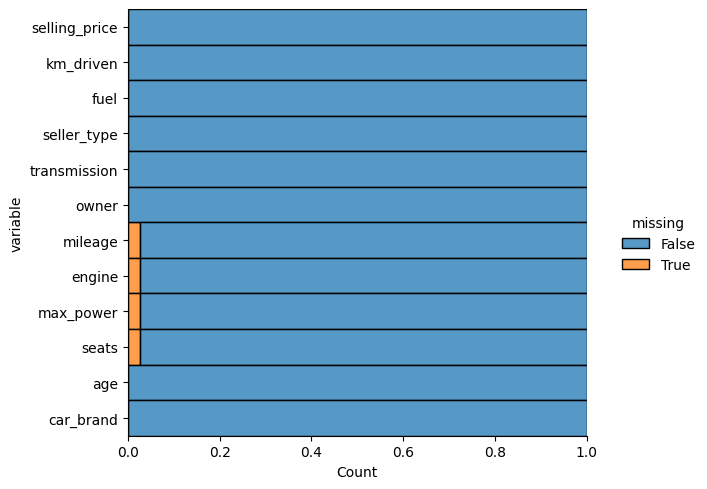

In [24]:
plt.figure(figsize = (10, 5))
sns.displot(
    data = car.isna().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.25
);

Now I know where the values are missing I wanted to see where the values where missing in the datasat. And in this graph below you can really see that there are straight lines. That means that some cars have multiple missing values. 

<AxesSubplot:>

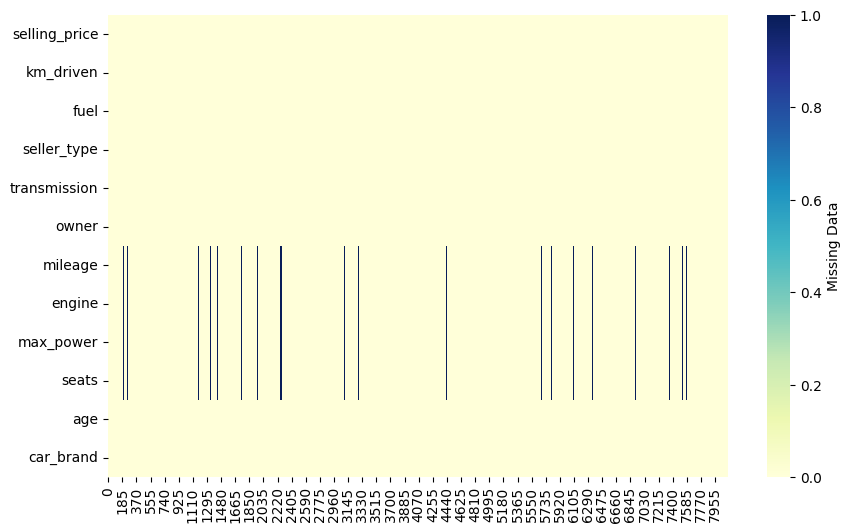

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(car.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


#### 2.4.1 How I filled missing data

You can see from these 2 graphs that in the most cases there is more than 1 missing value per car. Now we have visualized the missing values I can fill in those missing values. I am going to use the mean because that is all of the values devided by the rows. In the datasets there are some values that are way higher than other values and also the other way. I thought first that the median was better because with seats you can't have like 5,4 seats. But I considerd both options and eventually I came up with the mean as best(*IDOWU OMISOLA, I. (2021, 1 november). How to fill in missing data using python pandas. makeuseof. https://www.makeuseof.com/fill-missing-data-with-pandas/*). I have also compared the correlation before and after I filled in these missing values. There where 3 that have changed with 0.01 but these weren't for the selling price.

In [26]:
## I first used this code to fill in the missing values but it was to messy and tried to make it compactor.

# car.fillna({"mileage":car['mileage'].mean()}, inplace=True)
# car.fillna({"engine":car['engine'].mean()}, inplace=True)
# car.fillna({"max_power":car['max_power'].mean()}, inplace=True)
# car.fillna({"seats":car['seats'].mean()}, inplace=True)

# This code selects all the columns where the type is equal to int or float. I made this because if in the future a new column is added with 
# the type int or float the missing values will automatically fill in.
missing_values = [column for column in car.select_dtypes(["int", "float"])]

# This code does the same thing as the code above that I committed out. It takes the selected columns with the int or float and fills it in.
for col in missing_values:
    car[col].fillna(car[col].mean(), inplace = True)

As you can see below every missing value is filled in. 

In [27]:
car.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
age              0
car_brand        0
dtype: int64

I thought that after I have done all these things above that there wouldn't be any more null values. But in the columns max_power and mileage there were some more. These values can never be 0 because a mileage is normally in between 5 and 50. The max_power of 0 is a car that doesn't ride so that can not be sold. So After I came up with this new information I needed to fill those values in with good data. 

In [28]:
car[car['max_power'] == 0]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,car_brand
575,204999,97500,Petrol,Individual,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,11,Maruti
576,204999,97500,Petrol,Individual,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,11,Maruti
1442,589000,41232,Diesel,Dealer,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,5,Maruti
1443,589000,41232,Diesel,Dealer,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,5,Maruti
2549,240000,70000,Diesel,Individual,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,10,Tata
2550,240000,70000,Diesel,Individual,Manual,First Owner,19.418783,1458.625016,0.0,5.416719,10,Tata


In [29]:
car[car['mileage'] == 0]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,car_brand
644,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65.00,5.0,13,Tata
785,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.00,5.0,13,Hyundai
1649,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5.0,14,Hyundai
1676,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.00,5.0,11,Mercedes-Benz
2137,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179.0,115.00,5.0,9,Land
2366,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.10,5.0,12,Hyundai
2725,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.10,5.0,9,Hyundai
4527,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.00,5.0,11,Mercedes-Benz
5276,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5.0,14,Hyundai
5843,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0,8,Volkswagen


Just like the other Nan values I wanna use the mean to fill in the 0 values. To do this I had to do it a bit different so for the best way I went on the internet to search for a way to do this. On this website *(2022, 28 oktober). How to replace zero with specific values in Pandas DataFrames columns? EasyTweaks.com. https://www.easytweaks.com/replace-zero-values-pandas-dataframe/* it got used like the way I did below. After this all the missing data or bad data is clean. For this I am going to use the same argument I used before. The mean makes sure that most outliers get suppressed so that if all the data says like 15 and a few 200 that is stays around 15. 

In [30]:
Max_power = car['max_power']
Max_power.replace(to_replace = 0, value = Max_power.mean(), inplace=True)

In [31]:
Mileage = car['mileage']
Mileage.replace(to_replace = 0, value = Mileage.mean(), inplace=True)

### 2.5 Data visualization

After I filled all the missing data and improved the bad data. I wanted to see if there was a correlation between the variables so I made a heatmap.

In [32]:
car.corr()

,selling_price,km_driven,mileage,engine,max_power,seats,age
selling_price,1.000000,-0.225534,-0.127719,0.453567,0.746112,0.041161,-0.414092
km_driven,-0.225534,1.000000,-0.176835,0.203954,-0.037816,0.225172,0.418006
mileage,-0.127719,-0.176835,1.000000,-0.587517,-0.384392,-0.472304,-0.314210
engine,0.453567,0.203954,-0.587517,1.000000,0.703898,0.610309,-0.017773
max_power,0.746112,-0.037816,-0.384392,0.703898,1.000000,0.191910,-0.213589
seats,0.041161,0.225172,-0.472304,0.610309,0.191910,1.000000,0.008623
age,-0.414092,0.418006,-0.314210,-0.017773,-0.213589,0.008623,1.000000


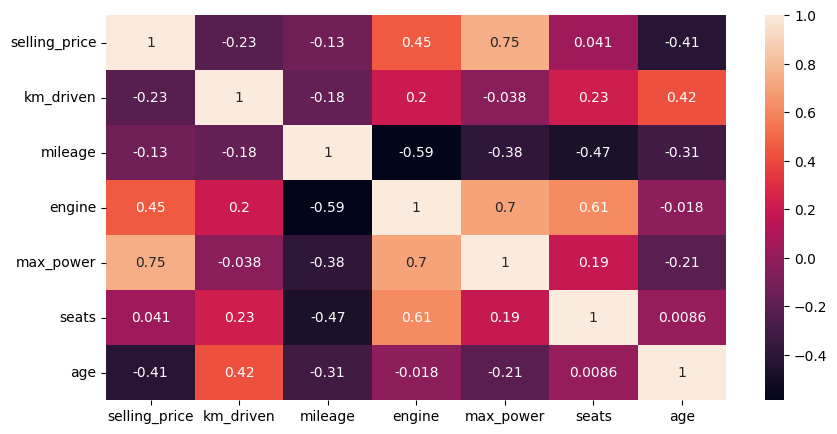

In [33]:
plt.figure(figsize = [10, 5])
sns.heatmap(car.corr(), annot = True);

You can see in the above heatmap that there are different correlations that are really high or very low.

The selling_price and the max_power is very high with a 0.75.

Also very high are selling_price with engine: 0.45.

The selling_price and the age are very low namely -0.41.

I wanted to know if age, car_brand, fuel and transmision are a good indicator for the price to go up or down. I tried to put this information in a graph and I thought that the bar plot was the best one to show this selling price. 

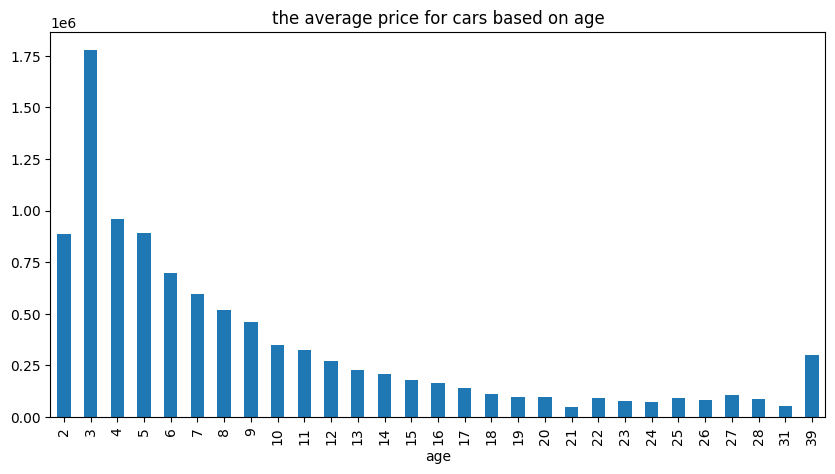

In [34]:
plt.figure(figsize = (10, 5))
car.groupby('age')['selling_price'].mean().plot(kind = 'bar')
plt.title("the average price for cars based on age")
plt.show()

As you can see in the image above there is a good correlation between the age of a car and the selling price. If a car is very young the price is way higher because it has newer technology in the car and isn't used as much as a car that is older. So by most older cars there is a higher change that some components has to be changed. So this is a usefull graph because now I am sure this is a feature I need to use to make my prediction.

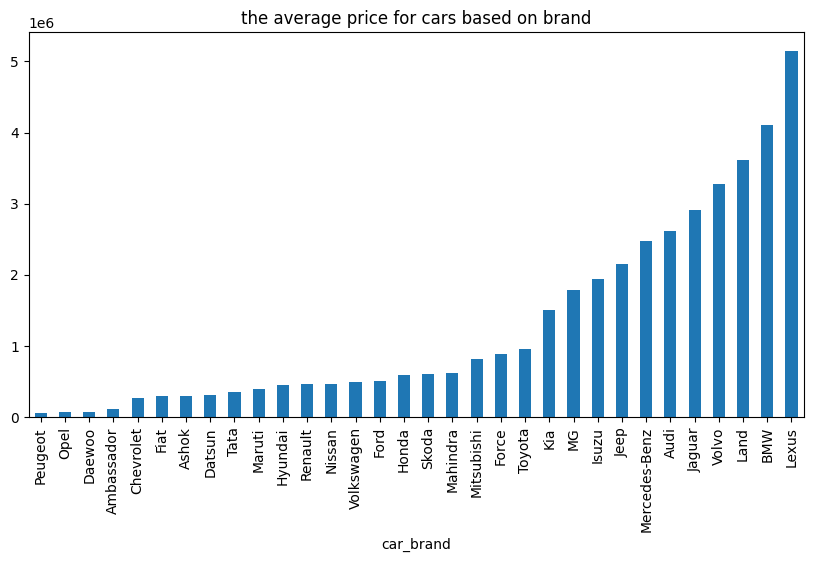

In [35]:
plt.figure(figsize = (10, 5))
car.groupby('car_brand')['selling_price'].mean().sort_values().plot(kind = 'bar')
plt.title("the average price for cars based on brand")
plt.show()

In the graph above you can see the avarage price for every car. As you can see there are some cars that cost on an avarage way more than other cars. I can use this information because in the heatmap I couldn't see the correlation between price and brand. This means that in phase 3 I have to hot-code the categorical data. 

In [36]:
car.groupby('fuel')['selling_price'].mean()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

As you can see from the graph is Diesel by far the most expensive car to buy. 

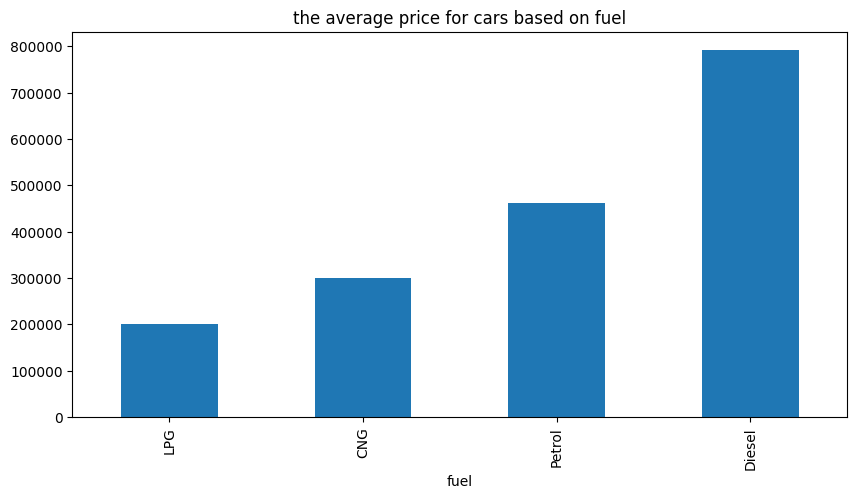

In [37]:
plt.figure(figsize = (10, 5))
car.groupby('fuel')['selling_price'].mean().sort_values().plot(kind = 'bar')
plt.title("the average price for cars based on fuel")
plt.show()

In [38]:
car.groupby('transmission')['selling_price'].mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

As you can see in the bar graph the cars that are automatic have an avarage higher price than the manuel cars. In the step understanding you can see the pie graph that around 85% of the sold cars are manual. So you can say that more people want a car that works eventough they have a manuel than spent more money to get an automatic.

Text(0.5, 1.0, 'the average price for cars based on transmission')

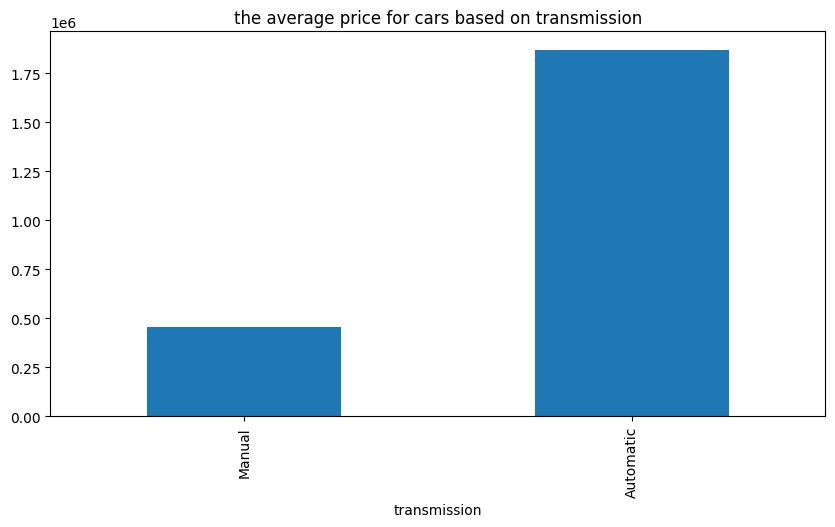

In [39]:
plt.figure(figsize = (10, 5))
car.groupby('transmission')['selling_price'].mean().sort_values().plot(kind = 'bar')
plt.title("the average price for cars based on transmission")

In the pairplot below you can see the relationships between every numeric column in the dataset. As you can see there are some columns that have a relastionship that can be explained. Like the relation between selling price and seats. There are just a few number of seats and the selling price can change to all sorts of numbers. Thats is why there are a few lines but go up a lot. 

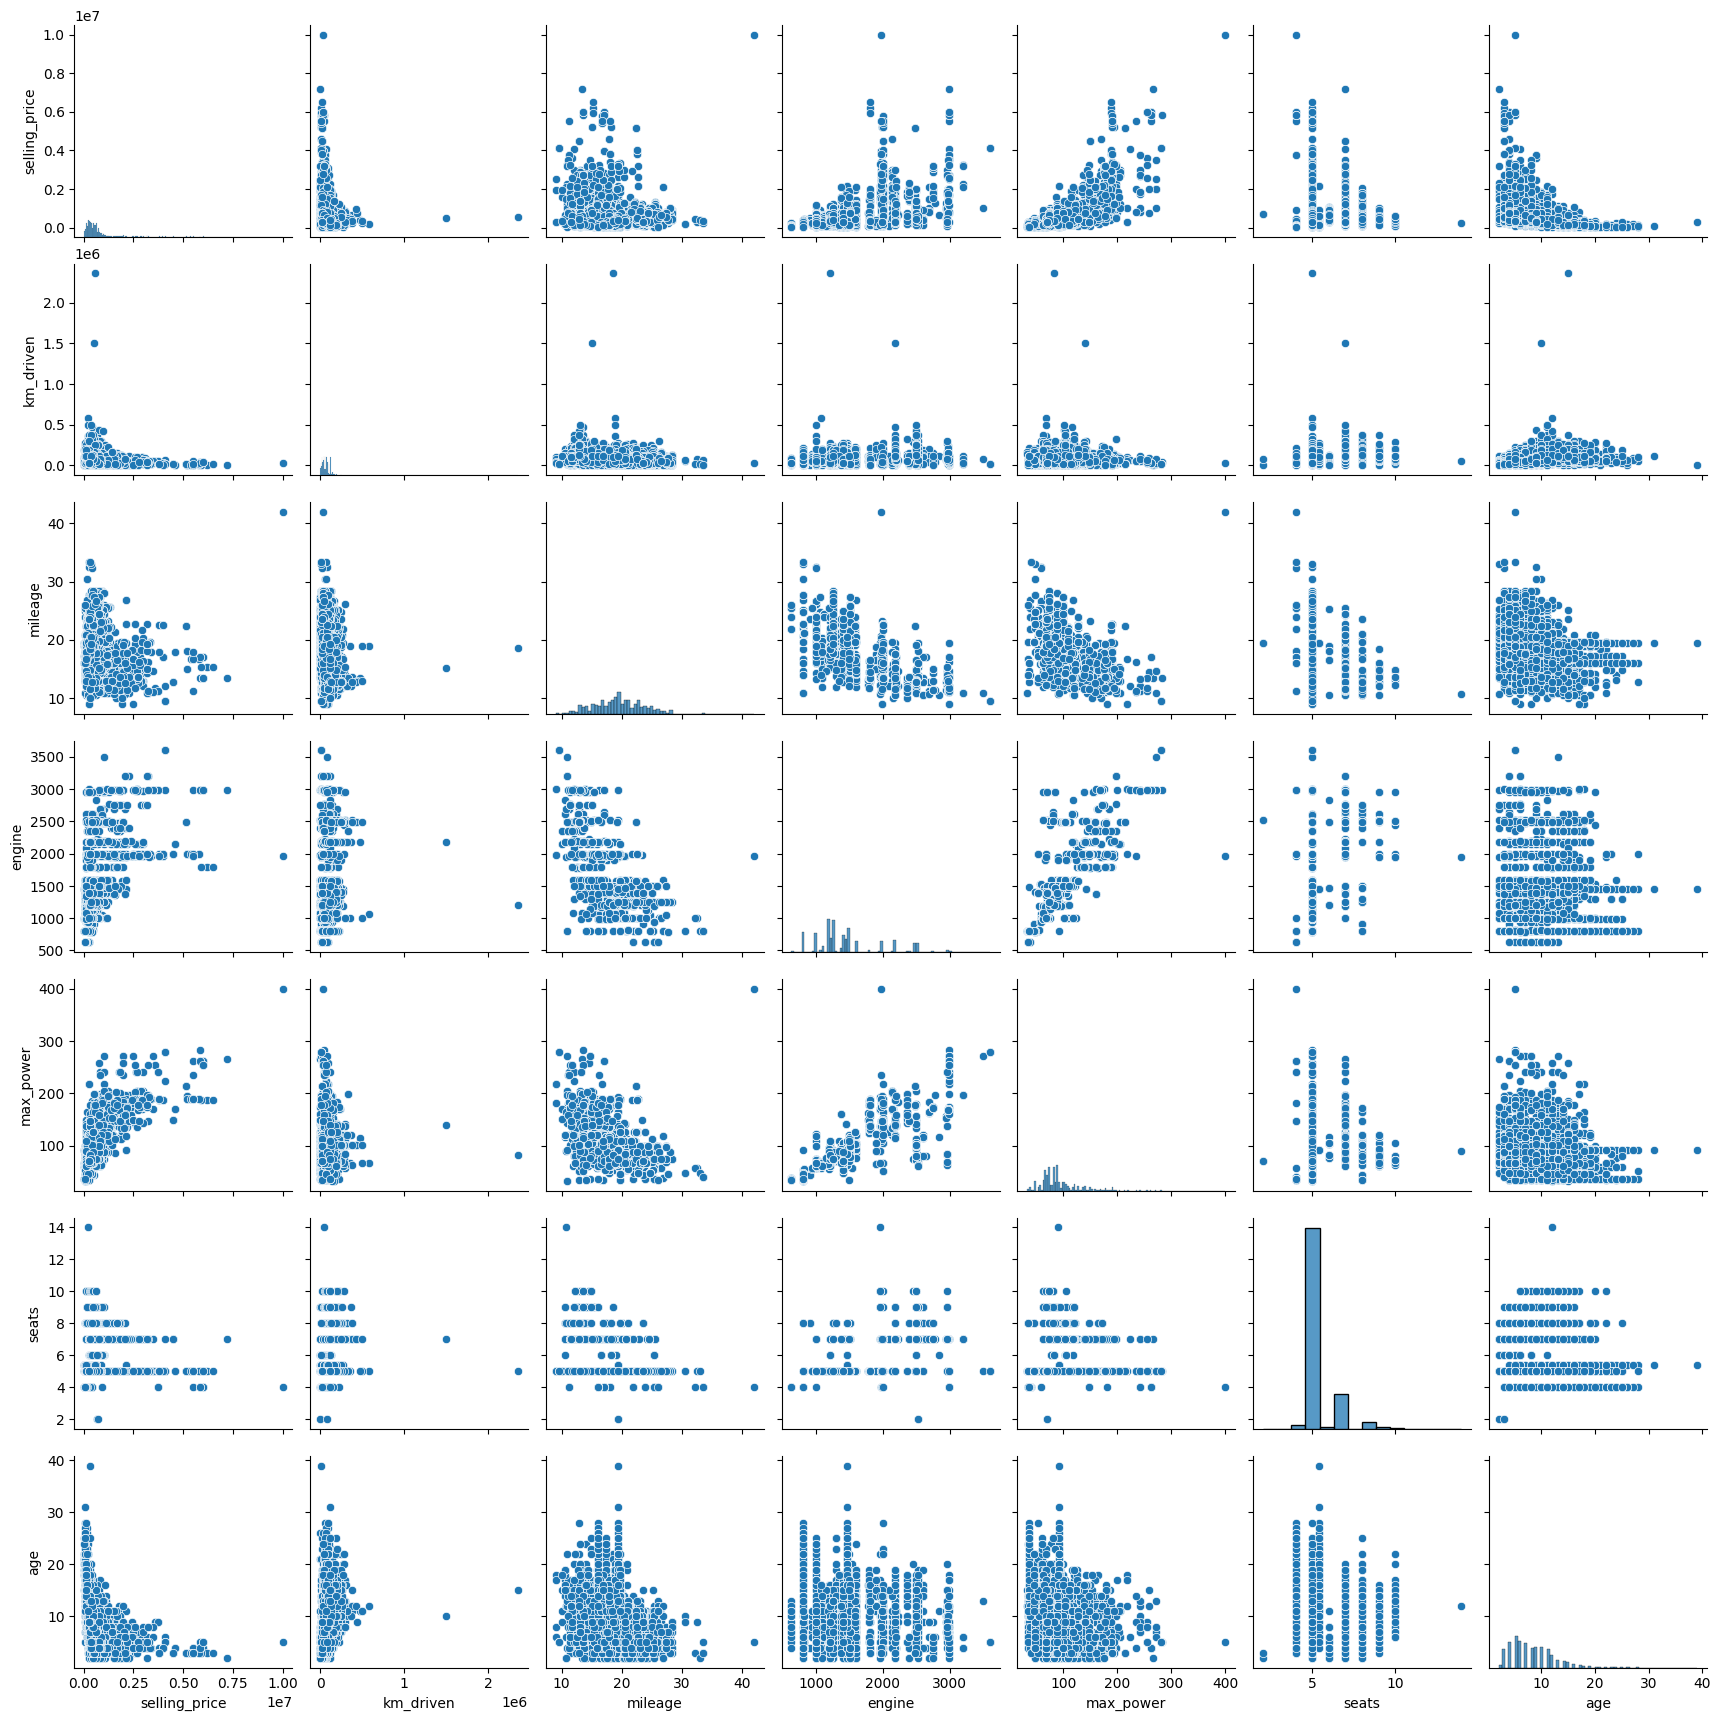

In [40]:
sns.pairplot(car)

## Phase 3 Predictions

### 3.1 Preprocessing

I have used this diagram *Choosing the right estimator. (z.d.). scikit-learn. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html* to see what kind of problem it is I am dealing with. It came out to be a regression problem because I want to predict a quantity and not a category that already is defined. It is also no dimensionality so it is a regression problem. I also have less then 100k samples so SDG regressor is not recommended. The Lasso and ElsticNet are recemmended for my problem. The nearest neighbour can be used for classification aswell as for regression so I am going to use that. 

My target variable is the selling_price because I want to predict the price for used cars. I am going to use a few models: support vectormachines, SGD and linear regression.

I have made some displot as you can see below. I looked for the skewness in my dataset and as you can see I have a positive skewness because the top is more on the left. 

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

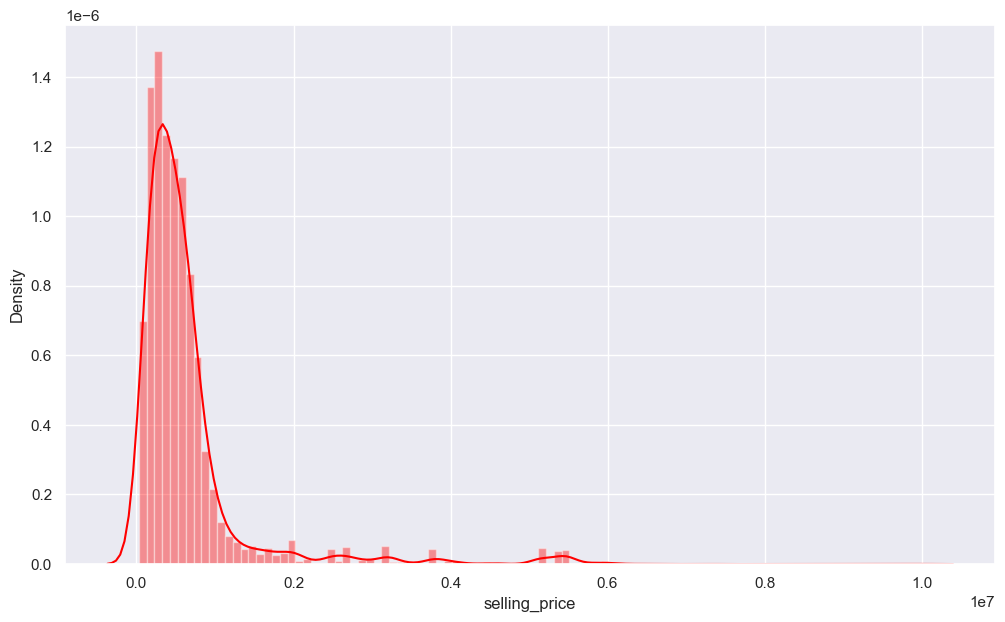

In [41]:
sns.set(rc = {"figure.figsize" : (12, 7)})
sns.distplot(car["selling_price"], bins = 100, color = "red")

I thought it would be useful to make a new dataset so that if I want to use the not normalized/fixed dataset I could use it.

In [42]:
cars = car.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

This code below is something I found about skewness. On this site *numpy.log1p — NumPy v1.23 Manual. (z.d.). https://numpy.org/doc/stable/reference/generated/numpy.log1p.html* I found about the log1p.

In [43]:
cars["selling_price"] = np.log1p(cars["selling_price"]) # if this is commented out than I use a normalized dataset 
cars["selling_price"].head(n = 10)

0    13.017005
1    12.821261
2    11.970357
3    12.323860
4    11.775297
5    12.994532
6    11.472114
7    10.714440
8    12.765691
9    12.206078
Name: selling_price, dtype: float64

In [44]:
# if this is commented out than I use log1p 
# numeric_data = [column for column in cars.select_dtypes(["int", "float"])]
# for c in numeric_data:
#     cars[c] = (cars[c] - cars[c].mean())/(cars[c].max()- cars[c].min())
#     cars[c]

As you can see in the graph below if it is different from the graph above than I used the log1p code and this fixes the skewness of my dataset. But if the graph looks the same I use the normalized dataset. Both have the same purpose and come with the same results when I do my prediction but it just takes different values.

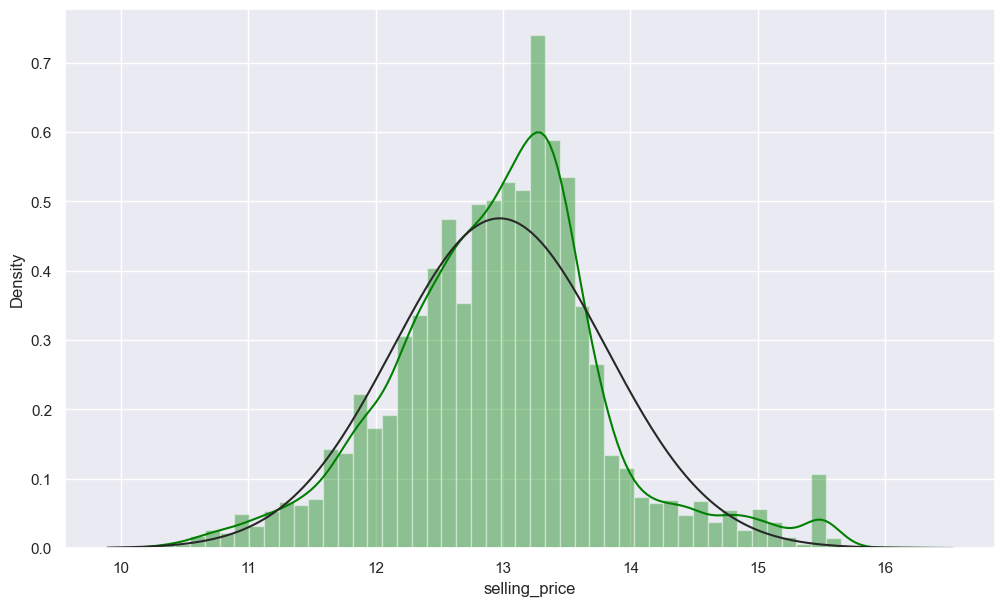

In [45]:
sns.distplot(cars["selling_price"], fit =  norm, color = "green");

In [46]:
# if this is commented out than I use a normalized dataset 
numeric_data = [column for column in cars.select_dtypes(["int", "float"])]
for c in numeric_data:
    cars[c] = np.log1p(cars[c]) 

I made an pairplot with the features that looked most promising in the heatmap. As you can see the values are still a bit scattered and not very close to each other.

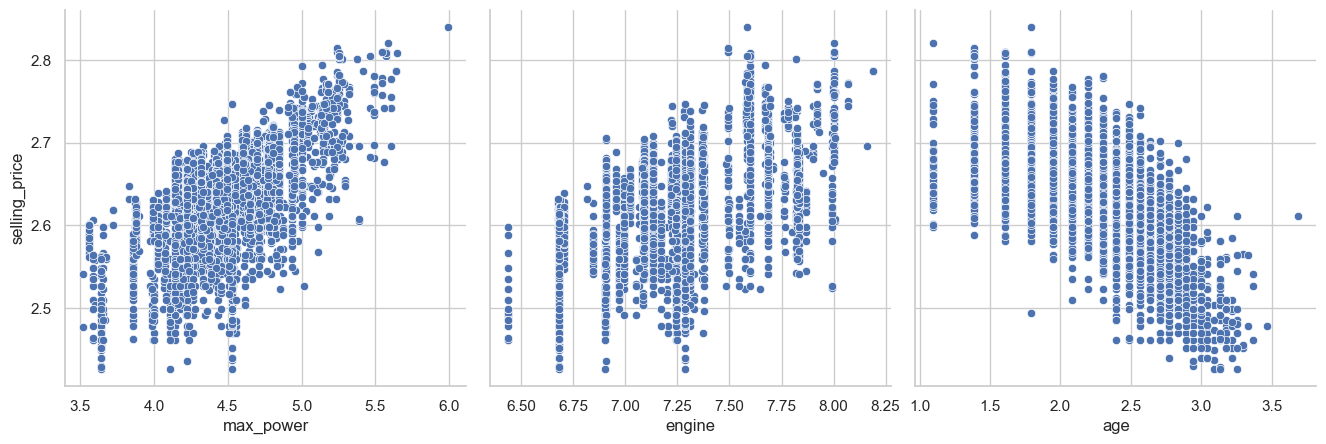

In [47]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(cars, x_vars=['max_power' ,'engine', 'age'], y_vars=['selling_price'], height=4.5);
plt.show()

### 3.2 Modelling

Here I selected the features for my regression model. In the y value it has to be the target variable and in the X value it has to be the feature variable.

In [48]:
y = cars["selling_price"]

 For the x value I want to use all features so also the categorical data. To do that I used a pandas feature that creates dummies(*pandas.get_dummies — pandas 1.5.1 documentation. (z.d.). https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html*). But I found that when I don't use drop_first that the prediction have some errors but I don't really know why (*removing redundant columns when using get_dummies. (2018, 4 mei). Stack Overflow. https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies*).

In [49]:
x = cars.drop("selling_price", axis = 1)
X = pd.get_dummies(x, drop_first=True)

Next I put the values that were stored in X and y into a training and test dataset. I set the test_size on 0.2 which means that 20% of the data rows will be used for test sets and 80% for the training sets. I also added a random_state that ensures that every time this train_test_split is getting called the same rows are used.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=4000
)

In [51]:
slr = LinearRegression()
slr.fit(X_train, y_train)

print('Intercept: %.3f' % slr.intercept_)
for i in range(slr.n_features_in_):
    print('Slope : %.3f' % slr.coef_[i])

Intercept: 2.278
Slope : 0.000
Slope : 0.010
Slope : 0.022
Slope : 0.059
Slope : 0.031
Slope : -0.075
Slope : 0.023
Slope : 0.012
Slope : 0.006
Slope : -0.002
Slope : -0.000
Slope : -0.005
Slope : -0.018
Slope : -0.007
Slope : 0.025
Slope : -0.012
Slope : -0.017
Slope : 0.040
Slope : 0.045
Slope : -0.018
Slope : -0.052
Slope : -0.018
Slope : -0.013
Slope : -0.013
Slope : -0.004
Slope : 0.005
Slope : 0.002
Slope : -0.003
Slope : 0.044
Slope : 0.019
Slope : -0.013
Slope : 0.050
Slope : 0.046
Slope : 0.013
Slope : -0.005
Slope : 0.005
Slope : 0.049
Slope : 0.007
Slope : 0.005
Slope : 0.000
Slope : -0.071
Slope : -0.000
Slope : 0.001
Slope : -0.028
Slope : 0.020
Slope : -0.000
Slope : 0.032


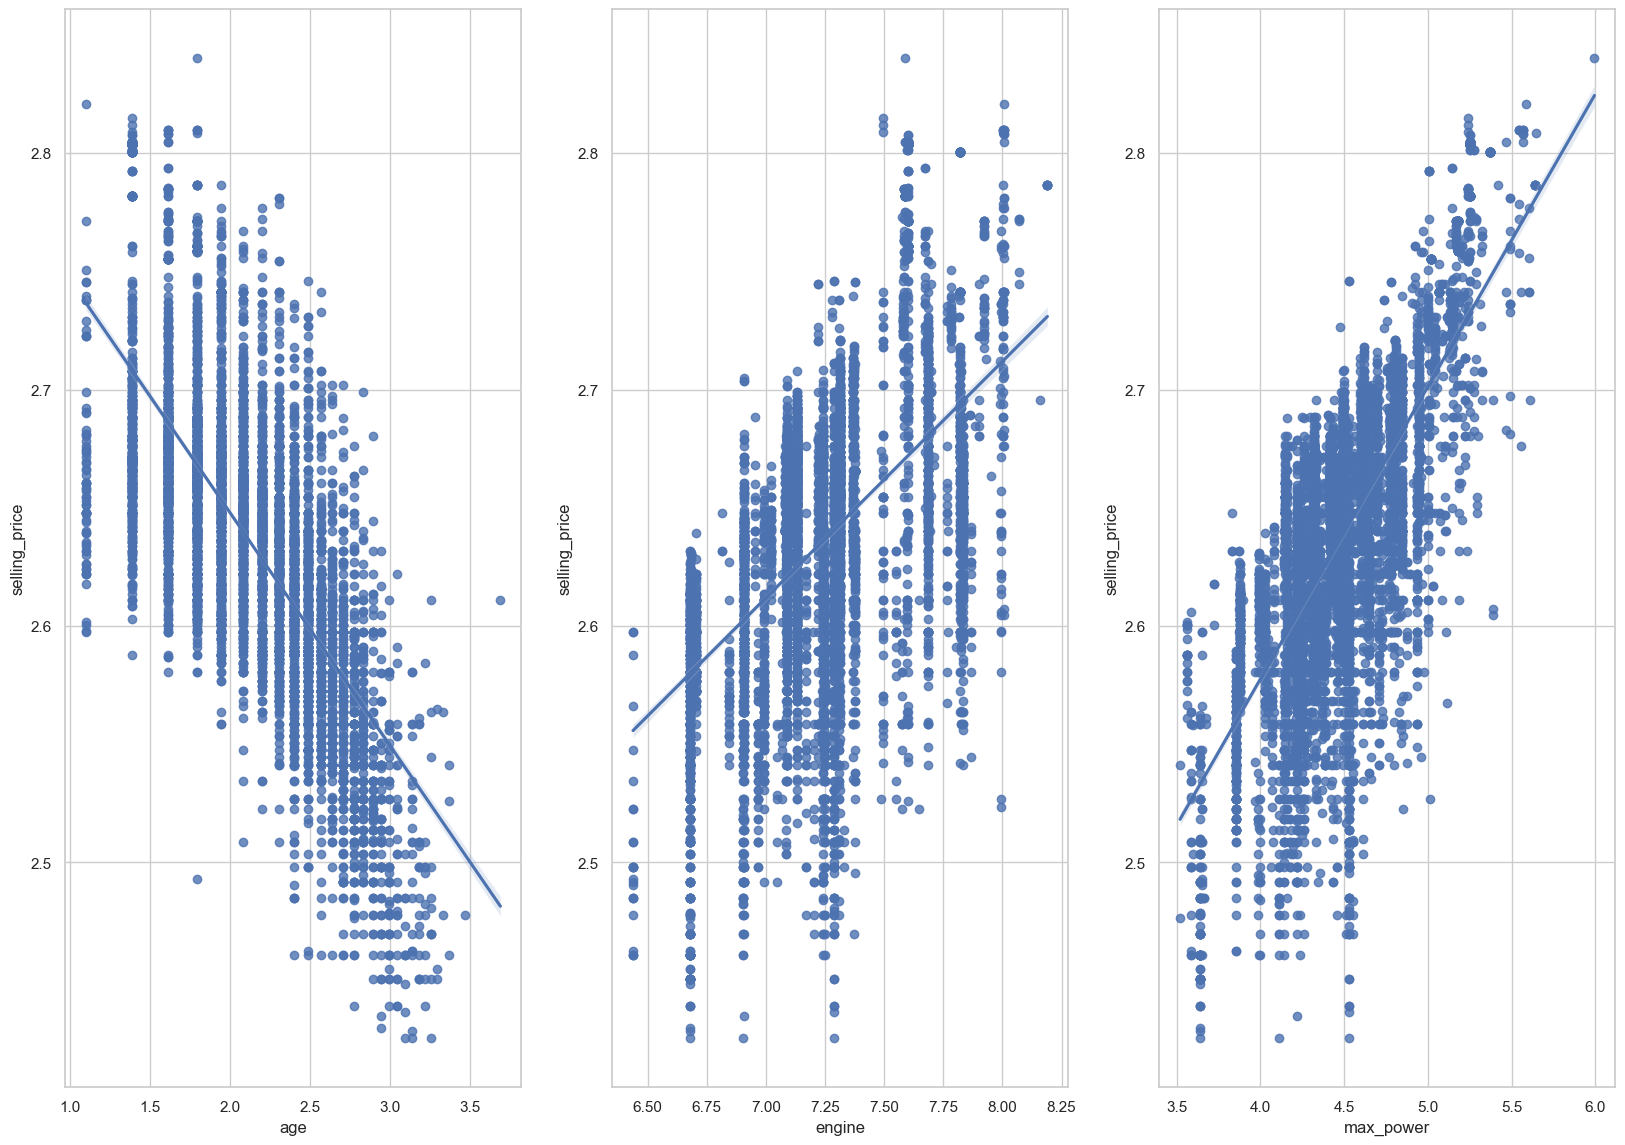

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(20, 14))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "selling_price", data = cars);
sns.regplot(ax = axes[1], x = "engine", y = "selling_price", data = cars);
sns.regplot(ax = axes[2], x = "max_power", y = "selling_price", data = cars);


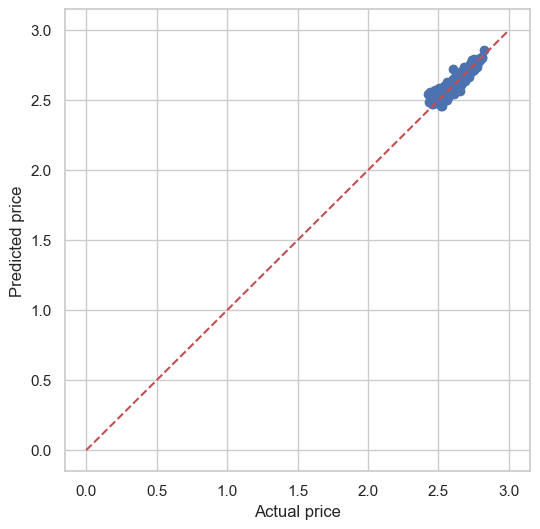

In [53]:
y_test_pred = slr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_test_pred)
plt.plot([0, 3], [0, 3], '--r')
plt.axis('tight')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

Now I am going to calculate the r2 and RMSE. As you can see below the scores are not bad but not the best because the values are still all over the place as you can see in the scatterplots above.

In [54]:
y_train_pred = slr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

y_test_pred = slr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

Model performance for training set
--------------------------------------
RMSE is 0.01961974946011984
R2 score is 0.8934418996463822


Model performance for test set
--------------------------------------
RMSE is 0.02076259561608429
R2 score is 0.8785038195626567


The RMSE score low as you can see above and below. **why is it so low and is the score than actually low**. The r2 score is very high which means that the data fits really good in the model. You can see that in the graphs becaue the blue dots are really close to each other in a straight line diagonal.

In [55]:
#mymodel = LinearRegression()
#mymodel = SGDRegressor()
#mymodel = Ridge()
mymodel = SVR()
mymodel.fit(X_train, y_train)

SVR()

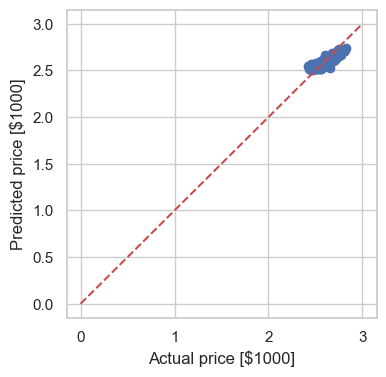

In [56]:
y_test_pred = mymodel.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test,y_test_pred)
plt.plot([0, 3], [0, 3], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.show()

In [57]:
y_train_pred = mymodel.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

y_test_pred = mymodel.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

Model performance for training set
--------------------------------------
RMSE is 0.04182840497389851
R2 score is 0.5156691159385988


Model performance for test set
--------------------------------------
RMSE is 0.04141518422280333
R2 score is 0.5165867732797248


### 3.3 Evaluation

I have done some regression models as you can see in phase 3 step 2. The best models are: LinearRegression and Ridge. But there are also a few models that are really bad such as: Lasso and SVR. The score for the linear regression models work better when I use the fixed skeweness dataset than the normalized dataset. 

The results are as followed without the categorical data: 

|                   |RMSE is            |R2 score is        |
|-------------------|-------------------|-------------------|
|Ridge regressor    |0.024596914540123842|0.8325208224353386
|Linear Regression  |0.024596832545984257|0.8325219390215798
|SVR                |0.03396603649774562|0.6806335439894384
|SDGregessor        |0.0476301256719956|0.3719951324134907


The results are as followed with the categorical data: 

|                   |RMSE is            |R2 score is        |
|-------------------|-------------------|-------------------|
|Ridge regressor    |0.02070385897191281|0.8791902639660603
|Linear Regression  |0.01961974946011984|0.8934418996463822
|SVR                |0.04182840497389851|0.5156691159385988
|SDGregessor        |0.03845925515595338|0.5905496062998591

As you can see the ridge and linear are the best regression models to predict the selling price. And if you compare the results when I used the categorical data you can see that every model except the SVR is improved. 

## Conclusion

My goal was to predict the car price of used cars. As you can see in the tables above it worked out pretty well. My scores are really high (r2) and low (rmse) and that means that the data fits the models good. With the best r2 score of: 0.89 and a RMSE score of: 0.020 is linear regression the best model. 

## Appendix

- How to transpose matrix in python. (2022, 15 maart). AppDividend. https://appdividend.com/2022/03/15/pandas-dataframe-transpose/
- handson-ml3/05_support_vector_machines.ipynb at main · ageron/handson-ml3. (z.d.). GitHub. https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb
- Support Vector Regression (SVR) using linear and non-linear kernels. (z.d.). scikit-learn. https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
- Vehicle dataset. (2020, 24 oktober). Kaggle. https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv